<a href="https://colab.research.google.com/github/seodalzzz/ESAA/blob/Python_Machine_Learning/Introductory_Pandas_Doit_TimeSeriesData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

#__12. 시계열 데이터__

일정 시간 간격으로 어떤 값을 기록한 데이터에서는 시계열 데이터가 매우 중요함.

##__12-1. datetime 오브젝트__

datetime 라이브러리 : 날짜와 시간을 처리하는 등의 다양한 기능을 제공하는 파이썬 라이브러리
  * date 오브젝트 : 날짜를 처리
  * tiem 오브젝트 : 시간을 처리
  * datetime 오브젝트 : 날짜와 시간을 모두 처리

###__1) datetime 오브젝트 사용하기__



####(1) datetime 오브젝트를 사용하기 위해 라이브러리 불러오기

In [ ]:
from datetime import datetime

####(2) now, today 메서드를 이용해 현재 시간 출력

In [ ]:
now1=datetime.now()
print(now1)

2022-04-11 05:41:34.824014


In [ ]:
now2=datetime.today()
print(now2)

2022-04-11 05:21:23.355959


####(3) datetime 오브젝트를 생성할 때 시간을 직접 입력하여 인자로 전달
  * 입력한 시간을 바탕으로 datetime 오브젝트가 생성 됨

In [ ]:
t1=datetime.now()
t2=datetime(1970,1,1)
t3=datetime(1970,12,12,13,24,24)

print(t1)
print(t2)
print(t3)


2022-04-11 05:22:54.121947
1970-01-01 00:00:00
1970-12-12 13:24:24


####(4) datetime 오브젝트를 이용하여 시간 계산

In [ ]:
# 두 datetime 오브젝트의 차이를 구함

diff1=t1-t2
print(diff1)
print(type(diff1))

19093 days, 5:22:54.121947
<class 'datetime.timedelta'>


In [ ]:
diff2=t2-t1

print(diff2)
print(type(diff2))

-19094 days, 18:37:05.878053
<class 'datetime.timedelta'>


###2) datetime 오브젝트로 변환하기 - read_csv 메서드

datetime 오브젝트로 변환하려는 열을 지정하여 데이터 집합을 불러오기

####(1) read_csv메서드의 parse_dates 인자에 datetime 오브젝트로 변환하고자 하는 열의 이름을 전달하여 데이터 집합 불러오기

In [5]:
ebola1=pd.read_csv('country_timeseries.csv',parse_dates=['Date'])
print(ebola1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

###3) datetime 오브젝트에서 날짜 정보 추출하기


####(1) 문자열로 저장된 날짜를 시리즈에 담아 datetime 오브젝트로 변환

In [11]:
date_series=pd.Series(['2018-05-16','2018-05-17','2018-05-18'])
d1=pd.to_datetime(date_series)
print(d1)

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]
0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]


####(2) datetime 오브젝트의 year, month, day 속성을 이용하여 년,월,일 정보 추출


In [12]:
print(d1[0].year)
print(d1[0].month)
print(d1[0].day)

2018
5
16


###4) dt 접근자 사용하기 - dt 접근자로 시계열 데이터 정리하기


####(1) ebola 데이터 집합을 불러온 다음 Date 열을 datetime 오브젝트로 변환하여 새로운 열로 추가


In [14]:
ebola=pd.read_csv('country_timeseries.csv')
ebola['date_dt']=pd.to_datetime(ebola['Date'])

####(2) dt접근자를 사용하지 않고 인덱스가 3인 데이터의 년, 월, 일 데이터를 추출

In [15]:
print(ebola[['Date','date_dt']].head())

         Date    date_dt
0    1/5/2015 2015-01-05
1    1/4/2015 2015-01-04
2    1/3/2015 2015-01-03
3    1/2/2015 2015-01-02
4  12/31/2014 2014-12-31


(3) date_dt 열에 한번에 접근한 다음 year 속성을 이용하여 연도값을 추출

In [16]:
ebola['year']=ebola['date_dt'].dt.year
print(ebola[['Date','date_dt','year']].head())

         Date    date_dt  year
0    1/5/2015 2015-01-05  2015
1    1/4/2015 2015-01-04  2015
2    1/3/2015 2015-01-03  2015
3    1/2/2015 2015-01-02  2015
4  12/31/2014 2014-12-31  2014


####(4) 월, 일 데이터를 한번에 추출해서 새로운 열로 추가


In [17]:
ebola['month'],ebola['day']=(ebola['date_dt'].dt.month,ebola['date_dt'].dt.day)
print(ebola[['Date','year','month','day']].head())

         Date  year  month  day
0    1/5/2015  2015      1    5
1    1/4/2015  2015      1    4
2    1/3/2015  2015      1    3
3    1/2/2015  2015      1    2
4  12/31/2014  2014     12   31


####(5) 각 열의 자료형 출력

In [19]:
print(ebola.info())
#date_dt 열은 datetime 오브젝트이고 나머지는 정수형

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

##__12-2 사례별 시계열 데이터 계산하기__


###__1) 에볼라 최초 발병일 계산하기__


####(1) ebola 데이터 프레임 살펴보기
  * 데이터가 시간 역순으로 정렬되어 있음

In [21]:
print(ebola.iloc[-5:,:5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117  3/27/2014    5         103.0            8.0                6.0
118  3/26/2014    4          86.0            NaN                NaN
119  3/25/2014    3          86.0            NaN                NaN
120  3/24/2014    2          86.0            NaN                NaN
121  3/22/2014    0          49.0            NaN                NaN


####(2) min을 이용하여 에볼라 최초 발생일 찾기

In [23]:
print(ebola['date_dt'].min())
print(type(ebola['date_dt'].min()))

2014-03-22 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


####(3) Date 열에서 최초 발생일을 빼 에볼라의 진행 정도를 파악

In [26]:
ebola['outbreak_d']=ebola['date_dt']-ebola['date_dt'].min()
print(ebola[['Date','Day','outbreak_d']].head())

         Date  Day outbreak_d
0    1/5/2015  289   289 days
1    1/4/2015  288   288 days
2    1/3/2015  287   287 days
3    1/2/2015  286   286 days
4  12/31/2014  284   284 days


###__2) 파산한 은행 개수 계산하기__
  * 파산한 은행 데이터를 불러와 분기별로 파산한 은행이 얼마나 되는지 계산

####(1) 파산한 은행 데이터 집합 불러오기

In [27]:
banks=pd.read_csv('banklist.csv')
print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  
0                   Royal Savings Bank    15-Dec-17    20-Dec-17  
1                          Conway Bank    13-Oct-17    20-Oct-17  
2            United Fidelity Bank, fsb    26-May-17    26-Jul-17  
3  First-Citizens Bank & Trust Company     5-May-17    26-Jul-17  
4                         Whitney Bank    28-Apr-17     5-Dec-17  


####(2) 문자열로 저장된 두 열을 오브젝트로 변환하여 불러오기


In [30]:
banks_no_dates=pd.read_csv('banklist.csv')
print(banks_no_dates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              555 non-null    object
 1   City                   555 non-null    object
 2   ST                     555 non-null    object
 3   CERT                   555 non-null    int64 
 4   Acquiring Institution  555 non-null    object
 5   Closing Date           555 non-null    object
 6   Updated Date           555 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.5+ KB
None


In [32]:
banks=pd.read_csv('banklist.csv',parse_dates=[5,6])
print(banks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null    object        
 3   CERT                   555 non-null    int64         
 4   Acquiring Institution  555 non-null    object        
 5   Closing Date           555 non-null    datetime64[ns]
 6   Updated Date           555 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.5+ KB
None


####(3) dt접근자와 quarter 속성을 이용하여 은행이 파산한 연도, 분기를 새로운 열로 추가


In [33]:
banks['closing_quarter'],banks['closing_year']=(banks['Closing Date'].dt.quarter,banks['Closing Date'].dt.year)
print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  \
0                   Royal Savings Bank   2017-12-15   2017-12-20   
1                          Conway Bank   2017-10-13   2017-10-20   
2            United Fidelity Bank, fsb   2017-05-26   2017-07-26   
3  First-Citizens Bank & Trust Company   2017-05-05   2017-07-26   
4                         Whitney Bank   2017-04-28   2017-12-05   

   closing_quarter  closing_year  
0                4          2017  
1                4          2017  
2    

####(4) 연도별로 파산한 은행이 얼마나 되는지 알아보기


In [34]:
closing_year=banks.groupby(['closing_year']).size()
print(closing_year)

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64


####(5) 각 연도별, 분기별로 파산한 은행의 개수

In [35]:
closing_year_q=banks.groupby(['closing_year','closing_quarter']).size()
print(closing_year_q)

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

####(6) 그래프 그리기


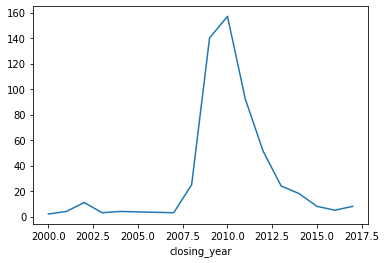

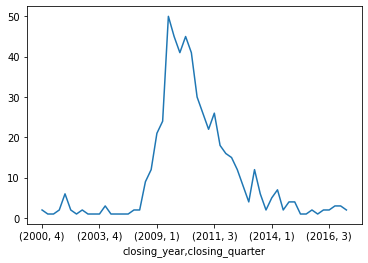

In [36]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
ax=closing_year.plot()
plt.show()
fig,ax=plt.subplots()
ax=closing_year_q.plot()
plt.show()

###__3) 테슬라 주식 데이터로 시간 계산하기__

pandas-datareader 라이브러리를 이용하여 주식 데이터 불러오기

In [ ]:
pip install pandas-datareader

####(1) 테슬라의 주식 데이터 내려받아 data 폴더 안에 저장

In [ ]:
pd.core.common.is_list_like=pd.api.types.is_list_like
import pandas_datareader as pdr

#tesla에는 데이터 프레임이 저장됨
tesla=pdr.get_data_quandl('TSLA',api_key='Z8WaLfsmb9PvXEyqnE6E')

#tesla에 저장된 데이터 프레임을 파일로 저장
tesla.to_csv('tesla_stock_quandl.csv')


####(2) tesla 데이터프레임 확인
  * Date 열은 문자열로 저장되어 있음

In [ ]:
print(tesla.head())

        Date    Open    High     Low   Close      Volume  ExDividend  \
0 2018-03-27  304.00  304.27  277.18  279.18  13696168.0         0.0   
1 2018-03-26  307.34  307.59  291.36  304.18   8324639.0         0.0   
2 2018-03-23  311.25  311.61  300.45  301.54   6600538.0         0.0   
3 2018-03-22  313.89  318.82  308.18  309.10   4914307.0         0.0   
4 2018-03-21  310.25  322.44  310.19  316.53   5927881.0         0.0   

   SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  
0         1.0   304.00   304.27  277.18    279.18  13696168.0  
1         1.0   307.34   307.59  291.36    304.18   8324639.0  
2         1.0   311.25   311.61  300.45    301.54   6600538.0  
3         1.0   313.89   318.82  308.18    309.10   4914307.0  
4         1.0   310.25   322.44  310.19    316.53   5927881.0  


####(3) Date 열을 Datetime 형으로 자료형 변환
  * read_csv 메서드로 데이터 집합을 불러올 때 parse_dates 인자에 Date 열을 전달

In [ ]:
tesla=pd.read_csv('tesla_stock_quandl.csv',parse_dates=[0])
print(tesla.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        240 non-null    datetime64[ns]
 1   Open        240 non-null    float64       
 2   High        240 non-null    float64       
 3   Low         240 non-null    float64       
 4   Close       240 non-null    float64       
 5   Volume      240 non-null    float64       
 6   ExDividend  240 non-null    float64       
 7   SplitRatio  240 non-null    float64       
 8   AdjOpen     240 non-null    float64       
 9   AdjHigh     240 non-null    float64       
 10  AdjLow      240 non-null    float64       
 11  AdjClose    240 non-null    float64       
 12  AdjVolume   240 non-null    float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 24.5 KB
None


####(4) Date 열의 자료형이 datetime 오브젝트로 변환됨.
  * dt 접근자 사용 가능


In [ ]:
print(tesla.loc[(tesla.Date.dt.year==2010)&(tesla.Date.dt.month==6)])

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume, ExDividend, SplitRatio, AdjOpen, AdjHigh, AdjLow, AdjClose, AdjVolume]
Index: []


###__4)datetime 오브젝트와 인덱스 - DatetimeIndex__

지금까지의 실습은 대부분데이터프레임의 행 번호를 인덱스로 사용했지만 datetime 오브젝트를 데이터 프레임의 인덱스로 설정하면 원하는 시간의 데이터를 바로 추출할 수 있음

###__datetime 오브젝트를 인덱스로 설정해 데이터 추출하기__


####(1) Date 열을 tesla 데이터프레임의 인덱스로 지정

In [ ]:
tesla.index=tesla['Date']
print(tesla.index)

DatetimeIndex(['2018-03-27', '2018-03-26', '2018-03-23', '2018-03-22',
               '2018-03-21', '2018-03-20', '2018-03-19', '2018-03-16',
               '2018-03-15', '2018-03-14',
               ...
               '2017-04-26', '2017-04-25', '2017-04-24', '2017-04-21',
               '2017-04-20', '2017-04-19', '2017-04-18', '2017-04-17',
               '2017-04-13', '2017-04-12'],
              dtype='datetime64[ns]', name='Date', length=240, freq=None)


####(2) datetime 오브젝트를 인덱스로 저장 후 원하는 시간의 데이터를 바로 추출

In [ ]:
print(tesla['2018'].iloc[:5,:5])

                 Date    Open    High     Low   Close
Date                                                 
2018-03-27 2018-03-27  304.00  304.27  277.18  279.18
2018-03-26 2018-03-26  307.34  307.59  291.36  304.18
2018-03-23 2018-03-23  311.25  311.61  300.45  301.54
2018-03-22 2018-03-22  313.89  318.82  308.18  309.10
2018-03-21 2018-03-21  310.25  322.44  310.19  316.53


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


####(3) 2018년 3월의 데이터 **추출**

In [ ]:
print(tesla['2018-03'].iloc[:,:5])

                 Date    Open    High       Low   Close
Date                                                   
2018-03-27 2018-03-27  304.00  304.27  277.1800  279.18
2018-03-26 2018-03-26  307.34  307.59  291.3600  304.18
2018-03-23 2018-03-23  311.25  311.61  300.4500  301.54
2018-03-22 2018-03-22  313.89  318.82  308.1800  309.10
2018-03-21 2018-03-21  310.25  322.44  310.1900  316.53
2018-03-20 2018-03-20  314.87  316.25  308.7600  310.55
2018-03-19 2018-03-19  316.50  320.75  309.6700  313.56
2018-03-16 2018-03-16  325.96  327.40  319.0700  321.35
2018-03-15 2018-03-15  329.38  332.85  321.1000  325.60
2018-03-14 2018-03-14  336.76  339.81  323.9300  326.63
2018-03-13 2018-03-13  344.92  345.12  336.2635  341.84
2018-03-12 2018-03-12  328.61  347.21  326.5000  345.51
2018-03-09 2018-03-09  324.10  328.49  322.3700  327.17
2018-03-08 2018-03-08  332.86  333.30  326.2740  329.10
2018-03-07 2018-03-07  325.44  332.50  321.7400  332.30
2018-03-06 2018-03-06  333.75  336.37  327.0300 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


###__5) 시간 간격과 인덱스 - TimedeltaIndex__

시간 간격을 인덱스로 지정하여 데이터를 추출
  * ex. 주식 데이터에서 최초 5일간 수집된 데이터만 살펴보고 싶은 경우

###__시간 간격을 인덱스로 지정해 데이터 추출하기__


####(1) Date 열에서 Date 열의 최솟값을 빼면 데이터를 수집한 이후에 시간이 얼마나 흘렀는지 알 수 있음

In [ ]:
tesla['ref_date']=tesla['Date'] - tesla['Date'].min()
print(tesla.head())

                 Date    Open    High     Low   Close      Volume  ExDividend  \
Date                                                                            
2018-03-27 2018-03-27  304.00  304.27  277.18  279.18  13696168.0         0.0   
2018-03-26 2018-03-26  307.34  307.59  291.36  304.18   8324639.0         0.0   
2018-03-23 2018-03-23  311.25  311.61  300.45  301.54   6600538.0         0.0   
2018-03-22 2018-03-22  313.89  318.82  308.18  309.10   4914307.0         0.0   
2018-03-21 2018-03-21  310.25  322.44  310.19  316.53   5927881.0         0.0   

            SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  \
Date                                                                     
2018-03-27         1.0   304.00   304.27  277.18    279.18  13696168.0   
2018-03-26         1.0   307.34   307.59  291.36    304.18   8324639.0   
2018-03-23         1.0   311.25   311.61  300.45    301.54   6600538.0   
2018-03-22         1.0   313.89   318.82  308.18    309.10   4

####(2) ref_date 열을인덱스로 지정

In [ ]:
tesla.index=tesla['ref_date']
print(tesla.iloc[:5,:5])

               Date    Open    High     Low   Close
ref_date                                           
349 days 2018-03-27  304.00  304.27  277.18  279.18
348 days 2018-03-26  307.34  307.59  291.36  304.18
345 days 2018-03-23  311.25  311.61  300.45  301.54
344 days 2018-03-22  313.89  318.82  308.18  309.10
343 days 2018-03-21  310.25  322.44  310.19  316.53


####(3) 데이터를 수집한 이후 최초 5일의 데이터를 추출

In [ ]:
print(tesla['5 days':].iloc[:5,:5])

               Date    Open      High     Low   Close
ref_date                                             
5 days   2017-04-17  302.70  304.0000  298.68  301.44
1 days   2017-04-13  296.70  307.3900  295.30  304.00
0 days   2017-04-12  306.34  308.4481  296.32  296.84


###__6) 시간 범위와 인덱스__

앞서 사용한 주식 데이터는 특정 일에 누락된 데이터가 없음. >>  만약 특정 일에 누락된 데이터도 포함시켜 데이터를 살펴보려면 임의로 시간 범위를 생성하여 인덱스로 지정

###__시간 범위 생성해 인덱스로 지정하기__


####(1) 에볼라 데이터 누락 확인 - 2015년1월1일

In [ ]:
ebola=pd.read_csv('country_timeseries.csv',parse_dates=[0])
print(ebola.iloc[:5,:5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0


####(2) 에볼라 데이터 누락 확인 - 2014년3월23일

In [ ]:
print(ebola.iloc[-5:,:5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


####(3) date_range 메서드를 사용하여 2014년 12월 31일부터 2015년 1월 5일 사이의 시간 인덱스 생성

In [ ]:
head_range=pd.date_range(start='2014-12-31',end='2015-01-05')
print(head_range)

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')


####(6) 원본 데이터 손상을 방지하기 위해 ebola 데이터프레임의 앞쪽 5개의 데이터를 추출하여 새로운 데이터프레임 만들기
  * Date 열을 인덱스로 먼저 지정해야 함

In [ ]:
ebola_5=ebola.head()
ebola_5.index=ebola_5['Date']
ebola_5.reindex(head_range)
print(ebola_5.iloc[:5,:5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2015-01-05 2015-01-05  289        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286           NaN         8157.0                NaN
2014-12-31 2014-12-31  284        2730.0         8115.0             9633.0


* 시간 범위를 index로 설정하면 DatetimeIndex 자료형이 만들어 짐.
* DatetimeIndex의 freq 속성 값을 지정하면 시간 간격을 조절하여 DatetimeIndex를 만들 수 있음

###__7) 시간 범위 수정하고 데이터 밀어내기 - shift 메서드__



###__에볼라의 확산 속도 비교하기__

####(1) ebola 데이터프레임의 Date 열을 인덱스로 지정한다음 x축을 Date열로 y축을 사망자수로 하는 그래프 그리기

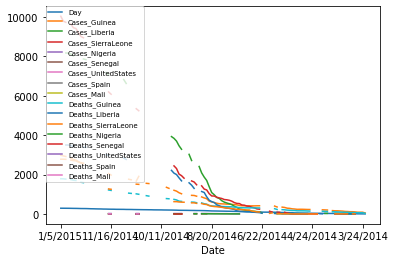

In [39]:
import matplotlib.pyplot as plt
ebola=pd.read_csv('country_timeseries.csv')

ebola.index=ebola['Date']

fig,ax=plt.subplots()
ax=ebola.iloc[0:,1:].plot(ax=ax)

ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()

####(2) 각 나라의 발병일을 가장 처음 에볼라가 발병한 Guinea와 동일한 위치로 옮겨 비교

In [40]:
ebola_sub=ebola[['Day','Cases_Guinea','Cases_Liberia']]
print(ebola_sub.tail(10))

           Day  Cases_Guinea  Cases_Liberia
Date                                       
4/4/2014    13         143.0           18.0
4/1/2014    10         127.0            8.0
3/31/2014    9         122.0            8.0
3/29/2014    7         112.0            7.0
3/28/2014    6         112.0            3.0
3/27/2014    5         103.0            8.0
3/26/2014    4          86.0            NaN
3/25/2014    3          86.0            NaN
3/24/2014    2          86.0            NaN
3/22/2014    0          49.0            NaN


####(3) 그래프를 그리기 위한 데이터 프레임 준비하기
  * Date 열의 자료형을 datetime 오브젝트로 변환

In [42]:
ebola=pd.read_csv('country_timeseries.csv',parse_dates=['Date'])
print(ebola.head().iloc[:,:5])

print(ebola.tail().iloc[:,:5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0
          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


####(4) ebola 데이터프레임의 Date 열의 최댓값과 최솟값으로 시간 범위를 생성하여 new_idx 에 저장 > 날짜가 아예 없었던 데이터의 인덱스 생성 가능

In [44]:
ebola.index=ebola['Date']
new_idx=pd.date_range(ebola.index.min(), ebola.index.max())

####(5) reversed 메서드를 사용하여 인덱스 뒤집기

In [45]:
print(new_idx)

new_idx=reversed(new_idx)

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')


####(6) reindex 메서드를 사용하여 new_idx를 새로운 인덱스로 지정

In [46]:
ebola=ebola.reindex(new_idx)
print(ebola.head().iloc[:,:5])

                 Date    Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                        
2015-01-05 2015-01-05  289.0        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288.0        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287.0        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286.0           NaN         8157.0                NaN
2015-01-01        NaT    NaN           NaN            NaN                NaN


In [47]:
print(ebola.tail().iloc[:,:5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2014-03-26 2014-03-26  4.0          86.0            NaN                NaN
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN
2014-03-24 2014-03-24  2.0          86.0            NaN                NaN
2014-03-23        NaT  NaN           NaN            NaN                NaN
2014-03-22 2014-03-22  0.0          49.0            NaN                NaN


####(7) 각나라의 에볼라 발병일 옮기기
  * last_valid, first_valid_index 메서드를 사용하여 각 나라의 에볼라 발병일 구하기
    * 각 메서드는 유효한 값이 있는 첫번째와 마지막 인덱스를 반환함.

In [48]:
last_valid=ebola.apply(pd.Series.last_valid_index)
print(last_valid)

Date                  2014-03-22
Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]


In [49]:
first_valid=ebola.apply(pd.Series.first_valid_index)
print(first_valid)

Date                  2015-01-05
Day                   2015-01-05
Cases_Guinea          2015-01-05
Cases_Liberia         2015-01-03
Cases_SierraLeone     2015-01-05
Cases_Nigeria         2014-12-07
Cases_Senegal         2014-12-07
Cases_UnitedStates    2014-12-07
Cases_Spain           2014-12-07
Cases_Mali            2014-12-07
Deaths_Guinea         2015-01-05
Deaths_Liberia        2015-01-03
Deaths_SierraLeone    2015-01-05
Deaths_Nigeria        2014-12-07
Deaths_Senegal        2014-12-07
Deaths_UnitedStates   2014-12-07
Deaths_Spain          2014-12-07
Deaths_Mali           2014-12-07
dtype: datetime64[ns]


####(8) 에볼라가 가장 처음 발병하 날에서 각 나라의 에볼라 발병일을 뺀 만큼 옮기기 > 각 나라의 에볼라 발병일을 동일한 출발선으로 옮김

In [51]:
earliest_date=ebola.index.min()
print(earliest_date)

shift_values=last_valid-earliest_date
print(shift_values)

2014-03-22 00:00:00
Date                    0 days
Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]


####(9) 각 나라의 에볼라 발병일 옮기기
  * shift() 메서드를 사용하여 모든 열의 값을 shift_values 값만큼 옮기기

In [52]:
ebola_dict={}
for idx,col in enumerate(ebola):
  d=shift_values[idx].days
  shifted=ebola[col].shift(d)
  ebola_dict[col]=shifted

####(10) DataFrame 메서드를 사용하여 ebola_dict의 값을 데이터프레임으로 변환

In [53]:
ebola_shift=pd.DataFrame(ebola_dict)

####(11) 에볼라의 최초 발병일을 기준으로 모든 열의 데이터가 옮겨짐

In [55]:
print(ebola_shift.tail())

     Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Nigeria  \
Day                                                                  
4.0          86.0            8.0                2.0            1.0   
3.0          86.0            NaN                NaN            NaN   
2.0          86.0            7.0                NaN            NaN   
NaN           NaN            3.0                2.0            NaN   
0.0          49.0            8.0                6.0            0.0   

     Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
Day                                                               
4.0            NaN                 1.0          1.0         NaN   
3.0            NaN                 NaN          NaN         NaN   
2.0            NaN                 NaN          NaN         NaN   
NaN            NaN                 NaN          NaN         NaN   
0.0            1.0                 1.0          1.0         1.0   

     Deaths_Guinea  Deaths_Liberia  Dea

####(12) 인덱스를 Day열로 지정하고 그래프에 필요없는 Date, Day 열은 삭제

In [54]:
ebola_shift.index=ebola_shift['Day']
ebola_shift=ebola_shift.drop(['Date','Day'],axis=1)

print(ebola_shift.tail())

     Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Nigeria  \
Day                                                                  
4.0          86.0            8.0                2.0            1.0   
3.0          86.0            NaN                NaN            NaN   
2.0          86.0            7.0                NaN            NaN   
NaN           NaN            3.0                2.0            NaN   
0.0          49.0            8.0                6.0            0.0   

     Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
Day                                                               
4.0            NaN                 1.0          1.0         NaN   
3.0            NaN                 NaN          NaN         NaN   
2.0            NaN                 NaN          NaN         NaN   
NaN            NaN                 NaN          NaN         NaN   
0.0            1.0                 1.0          1.0         1.0   

     Deaths_Guinea  Deaths_Liberia  Dea

####(13) 그래프 그리기

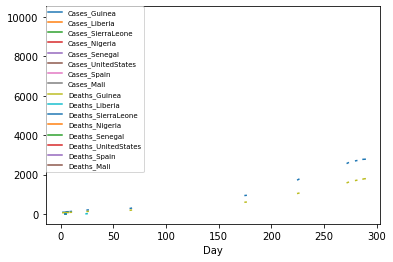

In [56]:
fig, ax=plt.subplots()
ax=ebola_shift.iloc[:,:].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()

###__8) 마무리하며__
판다스 라이브러리는 시간을 다룰 수 있는 다양한 기능을 제공함. 시계열 데이터를 능숙하게 다루는 것은 데이터 분석가의 기본 소양이므로 이 장의 내용을 반드시 익혀두어야 함.